In [1]:
import sys
sys.path.append("../src")
import numpy as np
import pykep as pk
from pykep.core import lambert_problem, ic2par, epoch, DAY2SEC, AU, propagate_lagrangian, fb_prop

In [2]:
# Time epoch to consider
body1 = pk.planet.jpl_lp('earth')
body2 = pk.planet.jpl_lp('mars')
T_START = pk.epoch_from_string('2020-06-01 15:59:54.003')
mu_common = body1.mu_central_body
mu1 = body1.mu_self
mu2 = body2.mu_self

tof = 200

dV_list = np.flip(np.linspace(0.0, 400, 5))

## First, plot the ballsitc transfer trajectory using lambert

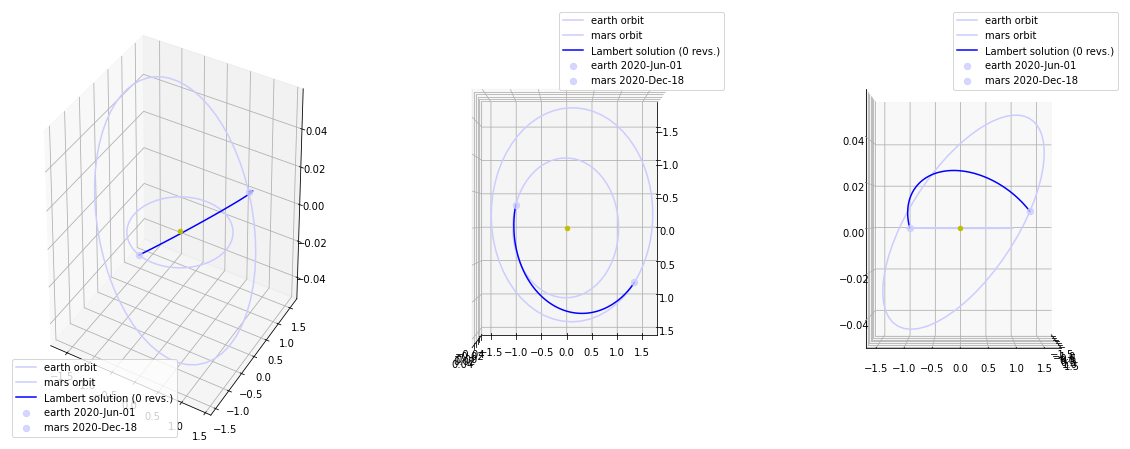

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from pykep.orbit_plots import plot_planet, plot_lambert, plot_kepler

# plot lambert solution
t_P0 = epoch(T_START.mjd2000)
r_P0, V_P0 = body1.eph(t_P0)

t_Pf = epoch(T_START.mjd2000 + tof)
r_Pf, V_Pf = body2.eph(t_Pf)

lambert = lambert_problem(r_P0, r_Pf, tof*DAY2SEC, mu_common, False, 0)
v0_l = np.array(lambert.get_v1()[0])   # scaled
vf_l = np.array(lambert.get_v2()[0])

mpl.rcParams['legend.fontsize'] = 10

# Create the figure and axis
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter([0], [0], [0], color=['y'])

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter([0], [0], [0], color=['y'])
ax2.view_init(90, 0)

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter([0], [0], [0], color=['y'])
ax3.view_init(0,0)

for ax in [ax1, ax2, ax3]:
    # Plot the planet orbits
    plot_planet(body1, t0=t_P0, color=(0.8, 0.8, 1), legend=True, units=AU, axes=ax)
    plot_planet(body2, t0=t_Pf, color=(0.8, 0.8, 1), legend=True, units=AU, axes=ax)
    # Plot the Lambert solutions
    axis = plot_lambert(lambert, color='b', legend=True, units=AU, axes=ax)
    # tof_s = tof * DAY2SEC
    # eta = 0.798
    # plot_kepler(r_P0, v0_l, eta*tof_s, color='r', N=500, units=AU, mu=mu_common, axes=ax, label='arc1')
    # plot_kepler(r_Pf, -vf_l, (1-eta)*tof_s, color='g', N=500, units=AU, mu=mu_common, axes=ax, label='arc2')

plt.show()

## Minimize V-inf (Apoapsis maneuver)
Objective type
- 1: Reduce V-infinity
- 2: Reduce TOF

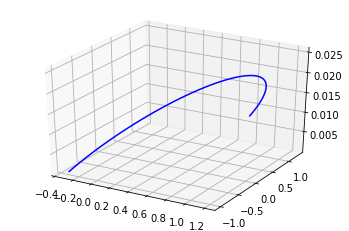

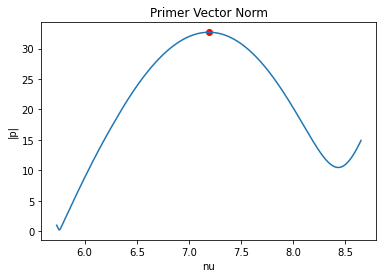

T_DV: 0.2647421628269826
Primer Vector Direction (RTN):  [-0.71579237  0.69812351  0.0162745 ]
theta_0m: 83.61  theta_0f: 167.21
DV: 400.00
  t_0m: 0.21390  t_mf: 0.33366  i0 [deg]:-0.05401
TOF Diff:  -3.3306690738754696e-16


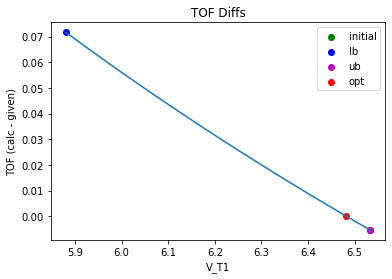

J  lambert-2.802e-01  DV:-2.244e-01
  eta: 0.391
  V0 Norm  Lambert: 32731.681  V: 32654.583
  V Norm  Lambert: 22606.024  V: 22811.023
  Initial  nu (Lambert): 328.41541270714947
  Initial  nu (DV)     : 330.08935506083145
  DV Point nu (Lambert): 412.02856447898694
  DV Point nu (DV)     : 53.702506832668966
  Final    nu (Lambert): 135.62753360549738
  Final    nu (DV)     : 132.12598698672022
DV: 300.00
  t_0m: 0.21336  t_mf: 0.33420  i0 [deg]:-0.04052
TOF Diff:  -2.220446049250313e-16


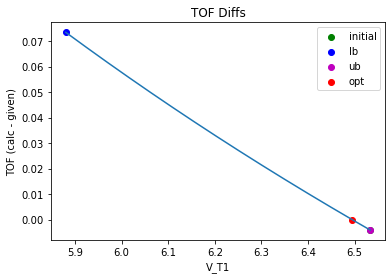

J  lambert-2.802e-01  DV:-2.386e-01
  eta: 0.390
  V0 Norm  Lambert: 32731.681  V: 32673.671
  V Norm  Lambert: 22606.024  V: 22759.413
  Initial  nu (Lambert): 328.41541270714947
  Initial  nu (DV)     : 329.6629785229775
  DV Point nu (Lambert): 412.02856447898694
  DV Point nu (DV)     : 53.27613029481482
  Final    nu (Lambert): 135.62753360549738
  Final    nu (DV)     : 133.01517835332794
DV: 200.00
  t_0m: 0.21282  t_mf: 0.33474  i0 [deg]:-0.02702
TOF Diff:  1.1102230246251565e-16


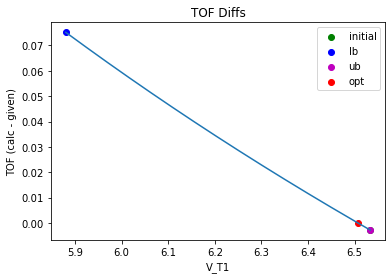

J  lambert-2.802e-01  DV:-2.526e-01
  eta: 0.389
  V0 Norm  Lambert: 32731.681  V: 32692.883
  V Norm  Lambert: 22606.024  V: 22708.043
  Initial  nu (Lambert): 328.41541270714947
  Initial  nu (DV)     : 329.24191353661115
  DV Point nu (Lambert): 412.02856447898694
  DV Point nu (DV)     : 52.85506530844851
  Final    nu (Lambert): 135.62753360549738
  Final    nu (DV)     : 133.8953803117107
DV: 100.00
  t_0m: 0.21228  t_mf: 0.33528  i0 [deg]:-0.01351
TOF Diff:  0.0


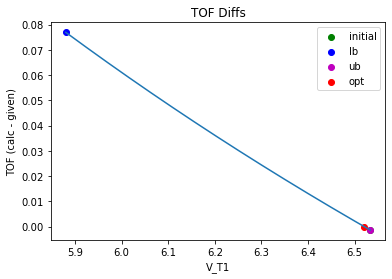

J  lambert-2.802e-01  DV:-2.665e-01
  eta: 0.388
  V0 Norm  Lambert: 32731.681  V: 32712.219
  V Norm  Lambert: 22606.024  V: 22656.914
  Initial  nu (Lambert): 328.41541270714947
  Initial  nu (DV)     : 328.8260836454632
  DV Point nu (Lambert): 412.02856447898694
  DV Point nu (DV)     : 52.43923541730066
  Final    nu (Lambert): 135.62753360549738
  Final    nu (DV)     : 134.76626594257996
DV: 0.00
  t_0m: 0.21175  t_mf: 0.33581  i0 [deg]:0.00000
TOF Diff:  -8.881784197001252e-16


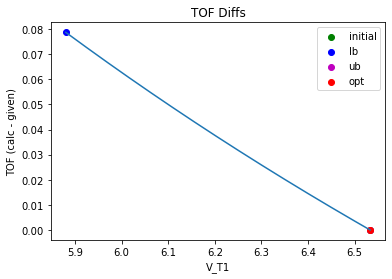

J  lambert-2.802e-01  DV:-2.802e-01
  eta: 0.387
  V0 Norm  Lambert: 32731.681  V: 32731.681
  V Norm  Lambert: 22606.024  V: 22606.024
  Initial  nu (Lambert): 328.41541270714947
  Initial  nu (DV)     : 328.4154127071494
  DV Point nu (Lambert): 412.02856447898694
  DV Point nu (DV)     : 52.028564478987015
  Final    nu (Lambert): 135.62753360549738
  Final    nu (DV)     : 135.62753360549715
 is zero


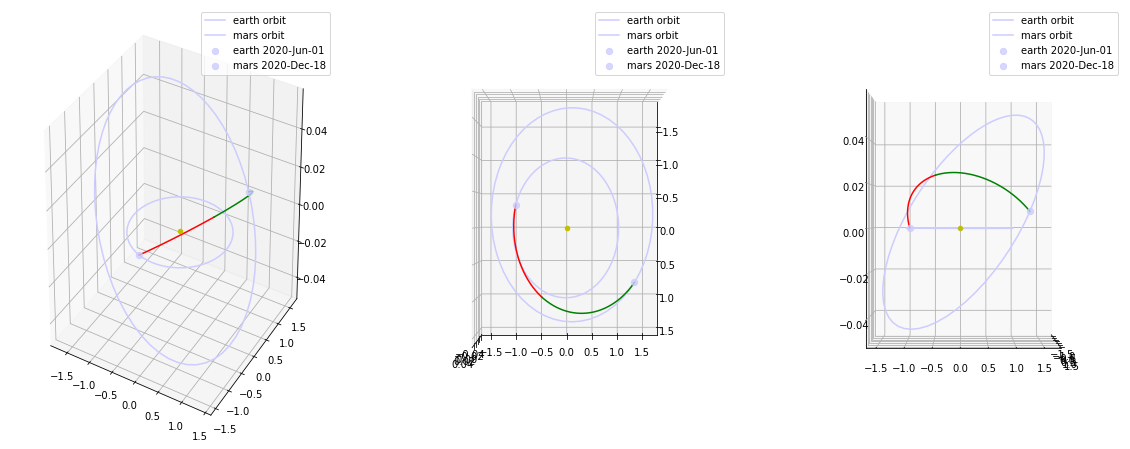

In [4]:
from maneuver_placement import solve_arc

succ, eta_store, V0_store, Vf_store, dum1, dum2, dum3 = solve_arc(body1, body2, T_START, tof, dV_list, mu_common, objective_type=1, debug=True)